In [154]:
# alpha:finish consulting; beta:new coming;
# overall timer format: (timepoint, event, stationid, serverid)

class Station:
    def __init__(self, stationid, overall_timer, process_param, n_server=0, n_buffer=0):
        self.stationid = stationid
        self.overall_timer = overall_timer
        self.s = n_server
        self.c = n_buffer
        self.wait = False
        self.status = [0, [0]*n_server] # 1 for occupied
        self.process_param = process_param
        self.next_station = None
    
    def setnext(self, next_station):
        self.next_station = next_station
        
    def printout(self):
        # print("time:{:.04f}".format(self.overall_timer[0][0]), " \tstation "+str(self.stationid)+":", self.status)
        return 0
    
    def update(self, timeslot):
        event= timeslot[1]
        if event == 'alpha':
            serverid = timeslot[3]
            self.alpha(serverid, timeslot)
        else:
            self.beta(timeslot)
        del(self.overall_timer[0])
        self.overall_timer.sort(key= lambda k:(k[0], int(-k[2])))
        
    def alpha(self, serverid, timeslot):
        if self.next_station == None:
            if self.status[0] > 0: # wqiting line is not empty
                self.status[0] -= 1
                try:
                    self.overall_timer.append((timeslot[0]+np.random.exponential(self.process_param), 'alpha', self.stationid, serverid))
                    self.printout()
                except:
                    print("empty process time list for station", self.stationid, "server", serverid)
            else:
                self.status[1][serverid] = 0
                self.printout()
                return True
        else:
            if self.next_station.beta(timeslot):
                if self.status[0] > 0: # waiting line is not empty
                    self.status[0] -= 1
                    try:
                        self.overall_timer.append((self.overall_timer[0][0]+np.random.exponential(self.process_param), 'alpha', self.stationid, serverid))
                        # del(self.process_times[0])
                        self.printout()
                    except:
                        print("empty process time list for station", self.stationid, "server", serverid)
                else:
                    self.status[1][serverid] = 0
                    self.printout()
                    return True
            else:
                for i in range(len(self.overall_timer)):
                    if self.overall_timer[i][2]==self.stationid+1:
                        self.overall_timer.append((self.overall_timer[i][0], 'alpha', self.stationid, serverid))
                        self.overall_timer.sort(key= lambda k:(k[0], int(-k[2])))
                        return True
                self.overall_timer.append((self.overall_timer[0][0], 'alpha', self.stationid, serverid))
                self.overall_timer.sort(key= lambda k:(k[0], int(-k[2])))
            
    def beta(self, timeslot=None):
        if self.status[0] > 0: 
            if self.status[0]<self.c:
                self.status[0]+=1
                self.printout()
                return True
            else:
                return False
        else:
            i = 0
            while i < self.s:
                if self.status[1][i]==0:
                    self.status[1][i]=1
                    self.overall_timer.append((timeslot[0]+np.random.exponential(self.process_param), 'alpha', self.stationid, i))
                    # self.process_times.remove(self.process_times[0])
                    break
                else:
                    i += 1
            if i == self.s:
                self.status[0]+=1
            self.printout()
            return True
        

In [155]:
import numpy as np
class simulation:
    def run(n_customers):
        timer = []
        t = np.random.poisson(2.1, n_customers)
        for i in range(n_customers):
            timer.append((t[i], 'beta', 0))
        timer.sort(key= lambda k:k[0])
            
        stations = []
        stations.append(Station(stationid=0, overall_timer=timer, process_param=2.9, n_server=1, n_buffer=5))
        stations.append(Station(stationid=1, overall_timer=timer, process_param=2.2, n_server=1, n_buffer=6))
        stations.append(Station(stationid=2, overall_timer=timer, process_param=2.2, n_server=1, n_buffer=6))
        stations.append(Station(stationid=3, overall_timer=timer, process_param=2.8, n_server=1, n_buffer=3))
        stations[2].setnext(stations[3])
        stations[1].setnext(stations[2])
        stations[0].setnext(stations[1])
        
        tt = 0
        while len(timer)>0:
            print(timer)
            tt = timer[0][0]
            stations[timer[0][2]].update(timer[0])
        return tt
            

In [159]:
simulation.run(n_customers=10)

[(0, 'beta', 0), (0, 'beta', 0), (1, 'beta', 0), (1, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (3, 'beta', 0), (3, 'beta', 0), (4, 'beta', 0)]
[(0, 'beta', 0), (0.5589320884834647, 'alpha', 0, 0), (1, 'beta', 0), (1, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (3, 'beta', 0), (3, 'beta', 0), (4, 'beta', 0)]
[(0.5589320884834647, 'alpha', 0, 0), (1, 'beta', 0), (1, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (3, 'beta', 0), (3, 'beta', 0), (4, 'beta', 0)]
[(1, 'beta', 0), (1, 'beta', 0), (1.0250941591658964, 'alpha', 0, 0), (1.613467187535797, 'alpha', 1, 0), (2, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (3, 'beta', 0), (3, 'beta', 0), (4, 'beta', 0)]
[(1, 'beta', 0), (1.0250941591658964, 'alpha', 0, 0), (1.613467187535797, 'alpha', 1, 0), (2, 'beta', 0), (2, 'beta', 0), (2, 'beta', 0), (3, 'beta', 0), (3, 'beta', 0), (4, 'beta', 0)]
[(1.0250941591658964, 'alpha', 0, 0), (1.613467187535797, 'alpha', 1, 0), (2, 'beta', 0), (2, 'beta', 0

43.38153919383489

In [134]:
import matplotlib.pyplot as plt
def conf_int_95(y):
    a = np.mean(y)
    b = np.sqrt(np.var(y, ddof=1))
    return (a-1.96*b, a+1.96*b)

(27.136695354816872, 56.724598925476975)


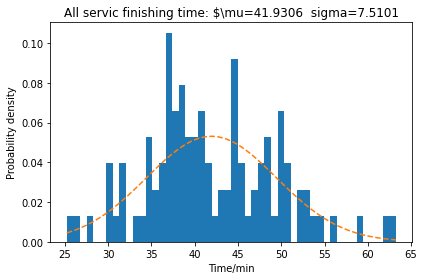

In [145]:
x0 = []
for i in range(100):
    x0.append(simulation.run(n_customers=200))
x = np.array(x0)
print(conf_int_95(x))

num_bins =  50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()
ax.set_title('All servic finishing time: $\mu='+str(round(mu, 4))+'  sigma='+str(round(sigma, 4)))
ax.set_xlabel('Time/min')
ax.set_ylabel('Probability density')

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

37.439492213016926
33.947874592713234
45.20720877322349
45.848737695600725
58.76202523864312
33.68359258702572
45.18533379026429
50.336322719974234
26.92845933498395
32.85827205597626
48.74870720924317
45.12966972367761
57.6441006559345
35.94364935796298
42.06317838916425
31.77766077571831
34.48264957425383
44.48538935873957
36.198615657704735
38.479014885532244
31.164729228700867
35.184505938279
32.118731860677435
27.9854774452319
37.84829207260219
42.108828333816
42.135338116874294
39.56327433096286
33.35540104105374
29.757029396495565
55.972139656730015
51.768649972227315
28.206312367025514
38.1582089775184
34.0091985432302
34.195139703039374
23.962184375481563
33.655341047701874
40.948108353865116
54.47708014018003
45.073017360690805
29.889838074529127
35.484444156768326
31.326266379735987
44.62988814024366
44.12294090669704
44.23629105829425
35.60903403081251
44.087191230416124
32.50112512668687
43.865025827446445
32.58500632368609
21.52984574617879
45.172306669148554
34.637895107

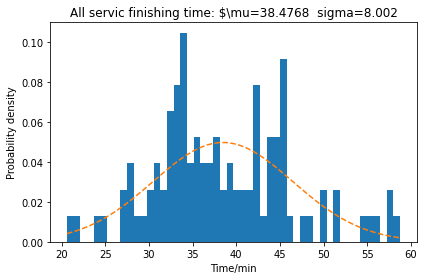

In [141]:
x0 = []
for i in range(100):
    for _ in range(100):
        x1 = []
        x1.append(simulation.run(n_customers=20))
    print(np.mean(x1))
    x0.append(np.mean(x1))
x = np.array(x0)
print(conf_int_95(x))

num_bins = 50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()
ax.set_title('All servic finishing time: $\mu='+str(round(mu, 4))+'  sigma='+str(round(sigma, 4)))
ax.set_xlabel('Time/min')
ax.set_ylabel('Probability density')

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

In [142]:
class simulation1:
    def run(n_customers):
        timer = []
        t = np.random.poisson(2.1, n_customers)
        for i in range(n_customers):
            timer.append((t[i], 'beta', 0))
        timer.sort(key= lambda k:k[0])
            
        stations = []
        stations.append(Station(stationid=0, overall_timer=timer, process_param=2.9, n_server=1, n_buffer=5))
        stations.append(Station(stationid=1, overall_timer=timer, process_param=2.2, n_server=2, n_buffer=6))
        stations.append(Station(stationid=2, overall_timer=timer, process_param=2.2, n_server=3, n_buffer=6))
        stations.append(Station(stationid=3, overall_timer=timer, process_param=2.8, n_server=1, n_buffer=3))
        stations[2].setnext(stations[3])
        stations[1].setnext(stations[2])
        stations[0].setnext(stations[1])
        
        tt = 0
        while len(timer)>0:
            # print(timer)
            tt = timer[0][0]
            stations[timer[0][2]].update(timer[0])
        return tt
            

In [148]:
simulation1.run(n_customers=10)

48.18714539783477